In [1]:
import sys
sys.path.append("..")
from hcipy.hcipy import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

D_tel = 1 # meter
wavelength = 1e-6 # meter
k = 2 * np.pi / wavelength
pupil_grid = make_pupil_grid(1000, D_tel)
focal_grid = make_focal_grid_from_pupil_grid(pupil_grid, 8, 16, wavelength=wavelength)
prop = FraunhoferPropagator(pupil_grid, focal_grid)
aperture = circular_aperture(D_tel)(pupil_grid)
fried_parameter = 0.2 # meter
outer_scale = 20 # meter
velocity = 10 # meter/sec
Cn_squared = Cn_squared_from_fried_parameter(fried_parameter, 500e-9)
layer = InfiniteAtmosphericLayer(pupil_grid, Cn_squared, outer_scale, velocity)

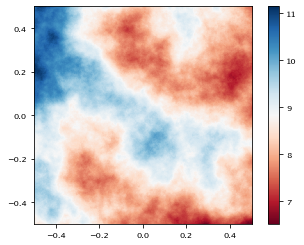

In [2]:
imshow_field(layer.phase_for(wavelength), cmap='RdBu')
plt.colorbar()
plt.show()

In [3]:
tip, tilt = (zernike(*ansi_to_zernike(i), D_tel)(pupil_grid) for i in (1, 2))

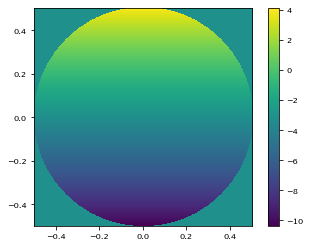

In [9]:
imshow_field(8 * np.arcsin(tip * (np.pi/4) / np.max(tip)) - np.pi)
plt.colorbar()

In [10]:
tip_wf, tilt_wf = (Wavefront(aperture * np.exp(-1j * z * k), wavelength) for z in (tip, tilt))
# prior to propagation, a phase shift should do nothing to intensity
assert np.allclose(tip_wf.intensity, tilt_wf.intensity)
tip_img, tilt_img = (prop(layer(wf)) for wf in (tip_wf, tilt_wf))
# after propagation, you should see some intensity change reflected in the different phases
assert not np.allclose(tip_img.intensity, tilt_img.intensity)
imshow_field(tip_img.intensity)
plt.colorbar()
plt.show()

AssertionError: 